# Tugas 2.3 - Self-Organizing Maps (Kelas ADF)

## Deadline pengumpulan 13 April 2018 pukul 21:00,
## Kumpulkan melalui IDEA

<br><br>

### Identitas Diri
Kerjakan dan jawablah soal-soal berikut dengan jelas dan terstruktur
1. Ubahlah filename Jupyter Notebook ini dengan NIM masing-masing, dengan format `Tugas23_[NIM].ipynb`<br>
   contoh: `Tugas23_130115xxxx.ipynb`
2. Isilah identitas diri pada *cell* di bawah
3. Jalankan *cell* di bawah dengan menekan tombol **Run** di toolbar, atau menekan tombol `Shift+Enter`

In [1]:
# isikan nim, nama, dan kelas
nama = "Septian Dwi Indradi"
nim = 1301154164
kelas = "IF-39-10"


### Persiapan Data
Jalankan *blok cell* di bawah untuk membangkitkan data. Perhatikan data yang diberikan

In [2]:
import numpy as np

np.random.seed(int(nim/3))
data = np.random.randint(10,size=(6,2)).astype(float)

print("data = \n  x  y\n------")
print(data)

data = 
  x  y
------
[[ 3.  8.]
 [ 2.  7.]
 [ 2.  1.]
 [ 4.  2.]
 [ 6.  8.]
 [ 7.  1.]]


Akan dibuat sebuah jaringan *Self-Organizing Maps* dengan input 6 data dan output 2 neuron (1 dimensi). <br>
Pada awal iterasi, bobot neuron akan diinisialisasi secara acak (*random generated*)

In [3]:
np.random.seed(int(nim/5))
neuron = np.random.randint(10,size=(2,2)).astype(float)

print("neuron = \n  x  y\n------")
print(neuron)

neuron = 
  x  y
------
[[ 0.  1.]
 [ 7.  3.]]


Jalankan *blok cell* di bawah untuk melihat visualisasi data

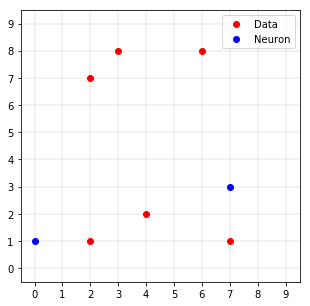

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
from cvxopt import matrix, solvers
import pprint as pp

COLORS = ['red', 'blue']
        
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xticks(np.arange(0,10,1))
ax.set_yticks(np.arange(0,10,1))
ax.set_xlim([-0.5, 9.5])
ax.set_ylim([-0.5, 9.5])
ax.scatter(data[:,0],data[:,1],c=COLORS[0],label='Data')
ax.scatter(neuron[:,0],neuron[:,1],c=COLORS[1],label='Neuron')
ax.grid(b=True, which='both', color='k', linestyle='-',linewidth=.1)
plt.legend()
plt.show()


### Exercise 1
Lakukan **ENAM** iterasi (*step*) algoritma ***Self-Organizing Maps*** terhadap 6 data yang diberikan <br><br>


**Algoritma *Self-Organizing Maps***:
0. inisialisasi $n=1$, Ulangi selama bobot belum konvergen:
1. Ambil sebuah titik untuk *step* ke-$s$ dari array data, 
2. Tentukan neuron "pemenang" $i(x)$ untuk data pada *step* ke-$s$ tersebut berdasarkan fungsi *Euclidean distance*
3. Update bobot setiap neuron berdasarkan perhitungan rumus berikut<br> 
    $w_j(s+1)= w_j(s)+\eta(s) \bullet \varphi (j, i(x), s) \bullet (x(s)-w_j(s)) $<br>
    (gunakan fungsi yang disediakan untuk mendapatkan nilai *neighborhood*)<br>
4. Update learning rate. Gunakan penurunan learning rate $decay=0.9$
    
    di mana:
    * $s$        &nbsp;&nbsp;&nbsp;&nbsp;: adalah *time step* ke-$s$  
    * $l$        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: adalah jumlah neuron  
    * $w_j$      &nbsp;&nbsp;: adalah vektor bobot neuron ke-j yang sedang diupdate, $j=1..l$
    * $\eta_0$   &nbsp;&nbsp;: adalah nilai *learning rate* awal $= 0.5$
    * 
    * $x(s)$ : adalah data ke-$s$ yang sedang diproses pada iterasi
    * $i(x)$ &nbsp;: adalah nomor neuron terbaik terhadap data *step* ke-$s$ yang sedang diproses
    * $w_j(s)$  &nbsp;: adalah vektor bobot neuron ke-$j$ pada *step* ke-$s$
    * $\eta(s)$ &nbsp;&nbsp;&nbsp;&nbsp;: adalah *learning rate*  pada *step* ke-$s$
    * $\varphi (j, i(x), s)$: adalah fungsi *neighborhood* untuk neuron ke-$j$ pada *step* ke-$s$

Tuliskan jawaban pada list `jawaban` yang diberikan dengan format: <br>
* dimensi pertama pada list `jawaban` merupakan step (sebanyak 6 step)
* isi dari `jawaban[i]` adalah list berukuran 3 yang menyatakan <br>
    * nomor neuron pemenang terhadap titik ke-`i`
    * x dan y baru untuk neuron pertama setelah update(`neuron 0`)
    * x dan y baru untuk neuron kedua setelah update(`neuron 1`)
    
---

[[0],[1.5000,4.5000],[5.9212,4.3485]]
[[1],[1.6050,5.0250],[4.1567,5.5417]]
[[1],[1.6674,4.3888],[3.2832,3.7023]]
[[0],[2.5177,3.5181],[3.3650,3.5081]]
[[0],[3.6600,4.9884],[3.5710,3.8593]]
[[0],[4.6461,3.8108],[3.7434,3.7156]]


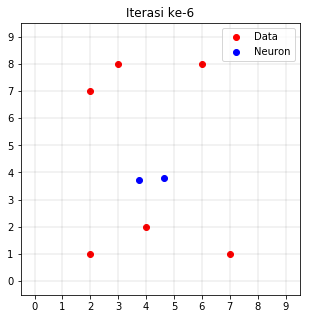

In [5]:
## Fungsi Educlidean Distance ##
def euclidean(x, n):
    """
    x : vektor data
    n : vektor neuron
    """
    return np.sqrt(np.sum((x - n) ** 2))


## Fungsi Gaussian untuk Neighborhood ##
import math
def get_neighborhood(j, ix, s):
    """
    j  : indeks neuron yang akan diupdate
    ix : indeks neuron terbaik
    s  : step
    """    
    sigma =.9*(.9**s)
    p = sigma**2
    d = abs(j-ix)**2
    if p == 0:
        return 0
    return math.exp(-d**2/(2*p))

n = 1
lr = 0.5
lrdecay = 0.9
for n in range(6) :
    distances = []
    distances.append(euclidean(neuron[0],data[n]))
    distances.append(euclidean(neuron[1],data[n]))
    ix = distances.index(max(distances))
    
    neuron[0] = neuron[0] + lr * get_neighborhood(0, ix, n) * (data[n]-neuron[0])
    neuron[1] = neuron[1] + lr * get_neighborhood(1, ix, n) * (data[n]-neuron[1])
    
    print("[[%i],[%.4f,%.4f],[%.4f,%.4f]]"%(ix,neuron[0][0],neuron[0][1],neuron[1][0],neuron[1][1]))
    
    lr *= lrdecay
    
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Iterasi ke-6")
ax.set_xticks(np.arange(0,10,1))
ax.set_yticks(np.arange(0,10,1))
ax.set_xlim([-0.5, 9.5])
ax.set_ylim([-0.5, 9.5])
ax.scatter(data[:,0],data[:,1],c=COLORS[0],label='Data')
ax.scatter(neuron[:,0],neuron[:,1],c=COLORS[1],label='Neuron')
ax.grid(b=True, which='both', color='k', linestyle='-',linewidth=.1)
plt.legend()
plt.show()

Contoh Kasus:
* terdapat 3 titik sbb: <br>
  `titik = [[1. 3.], [8. 1.], [7. 4.]]` <br>
* terdapat 2 neuron dengan bobot sbb: <br>
  `titik = [[3. 2.], [6. 2.]]` <br>
  <img src="images\01.png">


#### Pembelajaran SOM, iterasi 1:
* pada saat iterasi (*step*) pertama ($s=1$) terhadap data pertama `x = [1. 3.]`, <br>
    akan didapatkan neuron pemenang adalah neuron kedua (`neuron 0 = [3. 2.]`)<br>
    dikarenakan jarak (*euclidean distance*)`x` ke `neuron 0` yang lebih dekat (`distances= 2.23`). <br>
    Sehingga didapatkan $i(1)=0$
* pada saat update bobot, didapatkan 
    * `neuron 0` diperbarui menjadi <br>`= [3. 2.] + lr * get_neighborhood(0, 0, 1) * ([1. 3.]-[3. 2.])`<br>
         `= [3. 2.] + 0.5 * 1.0 * [-2.  1.] `<br>`= [3. 2.] + [-1.   0.5] `<br>`= [2.  2.5]`
    * `neuron 1` diperbarui menjadi <br>`= [6. 2.] + lr * get_neighborhood(1, 0, 1) * ([1. 3.]-[6. 2.])`<br>
         `= [6. 2.] + 0.5 * 0.46 * [-5.  1.] `<br>`= [6. 2.] + [-1.17  0.23] `<br>`= [4.83 2.23]`
  <img src="images\02.png">
* perbarui learning rate dengan `lr = lr * 0.9`
  
---

#### Pembelajaran SOM, iterasi 2:

* pada saat iterasi (*step*) kedua ($s=2$) terhadap data kedua `x = [8. 1.]`, <br>
    akan didapatkan neuron pemenang adalah neuron kedua (`neuron 1 = [4.83 2.23]`)<br>
    dikarenakan jarak (*euclidean distance*)`x` ke `neuron 1` yang lebih dekat (`distances= 3.39`). <br>
    Sehingga didapatkan $i(1)=1$
* pada saat update bobot, didapatkan 
    * `neuron 0` diperbarui menjadi <br>`= [2.  2.5] + lr * get_neighborhood(0, 1, 2) * ([8. 1.]-[2.  2.5])`<br>
         `= [2.  2.5] + 0.45 * 0.39 * [6.  -1.5] `<br>`= [2.  2.5] + [ 1.05 -0.26] `<br>`= [3.05 2.24]`
    * `neuron 1` diperbarui menjadi <br>`= [4.83 2.23] + lr * get_neighborhood(1, 1, 2) * ([8. 1.]-[4.83 2.23])`<br>
         `= [4.83 2.23] + 0.45 * 1.0  * [3.17 -1.23] `<br>`= [4.83 2.23] + [1.43 -0.56] `<br>`= [6.26 1.68]`
  <img src="images\03.png">

Sehingga, isi dari list `jawaban` adalah: <br>
`jawaban = [
    [[0], [2.   , 2.5 ],[4.83 , 2.23]],        # koordinat neuron pada step 1
    [[1], [3.05 , 2.24],[6.26 , 1.68]],        # koordinat neuron pada step 2
    [[?], [?    ,    ?],[?    ,    ?]],        # koordinat neuron pada step 3
]`

In [6]:
### TODO : Isikan neuron pemenang dan koordinat neuron setiap step ###
jawaban = [
    [[0],[1.5000,4.5000],[5.9212,4.3485]],    # koordinat neuron pada step 1
    [[1],[1.6050,5.0250],[4.1567,5.5417]],    # koordinat neuron pada step 2
    [[1],[1.6674,4.3888],[3.2832,3.7023]],    # koordinat neuron pada step 3
    [[0],[2.5177,3.5181],[3.3650,3.5081]],    # koordinat neuron pada step 4
    [[0],[3.6600,4.9884],[3.5710,3.8593]],    # koordinat neuron pada step 5
    [[0],[4.6461,3.8108],[3.7434,3.7156]],    # koordinat neuron pada step 6
]

#### Pertanyaan 1
Ada berapa layerkah di dalam Jaringan Syaraf Kohonen? <br>
Apakah tugas/proses yang dilakukan oleh setiap layer tersebut?<br>
Jelaskan jawaban Anda!

#### Jawaban Pertanyaan 1

Jawab: 2 layer, layer pertama yaitu input layer menerima input berupa data point (pada kasus ini x dan y), layer kedua adalah output layer berupa 1D atau 2D vector yang akan ditraining untuk melakukan mapping terhadap data.

#### Pertanyaan 2
Jaringan *Self Organizing Map* dikatakan dapat melakukan reduksi terhadap dimensi data.<br>
Jelaskan apakah yang dimaksud dengan pernyataan tersebut.<br>
Bagaimanakah SOM dapat digunakan untuk mengkompresi data?<br>
Berikan contoh penggunaan kemampuan SOM tersebut terhadap kasus nyata!<br>
Jelaskan jawaban Anda!

#### Jawaban Pertanyaan 2

Jawab: Output layer dari SOM adalah suatu grid berbentuk 1D atau 2D. Grid tersebut menjadi non-linear pada data yang berdimensi besar, dan akan melakukan mapping terhadap data tersebut. Maka SOM dikatakan dapat mereduksi dimensi karena dapat melakukan mapping data berdimensi-m ke dalam 2D SOM grid.

Contoh penggunaan SOM adalah untuk mengkompresi citra. SOM dapat menghasilkan feature map yang kemudian digunakan untuk membuat skema kompresi dan menghasilkan compression rate yang baik tanpa menurunkan kualitas gambar [https://pdfs.semanticscholar.org/fad8/e446234ac01654ef51576758bae9ffe6d2c4.pdf]

#### Pertanyaan 3
Data yang digunakan dalam *Unsupervised Learning* tidak memiliki nilai target output.<br>
Jadi, apakah yang sebenarnya dilakukan / dipelajari di dalam proses *Unsupervised Learning*?<br>
Jelaskan jawaban Anda!

#### Jawaban Pertanyaan 3

Jawab: Pada unsupervised learning, suatu model ditraining untuk menemukan struktur dari data yang diberikan dengan menganalisis fitur-fitur yang terdapat pada data tersebut. Model kemudian akan belajar membuat mapping dari suatu input terhadap output berdasarkan struktur data yang didapatkan.